In [60]:
# Araç Maintanence Predict

In [42]:
# Build_a_predictive_maintenance_model_for_a_delivery_company
# failure
#Hataya Uğramamış Araç Sayısı ile Uğramış olan Araç sayısı çok az olduğundan imblance sözkonusu
#Precision-Recall Tradeoff
#Undersampling and Oversampling using imbalanced-learn


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [125]:
df=pd.read_csv("failure.csv")

In [126]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [127]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [129]:
##Null Kayıtlara bakıyoruz
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [15]:
## Feature Engineering

In [130]:
##Date Kolonunun Data Type ını düzeltiyoruz.
df["date"]=pd.to_datetime(df["date"])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute8  124494 non-null  int64         
 11  attribute9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [132]:
df["year"]=2023-df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [133]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,8,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,8,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,8,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,8,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,8,1,1


In [134]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,8,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,8,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,8,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,8,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,8,1,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute8  124494 non-null  int64         
 11  attribute9  124494 non-null  int64         
 12  year        124494 non-null  int64         
 13  month       124494 non-null  int64         
 14  day         124494 non-null  int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory u

In [136]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
year          0
month         0
day           0
dtype: int64

In [137]:
##korelasyonuna bakıyoruz.
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,NaN,0.000321,0.002994
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,NaN,-0.005613,-0.000239
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,NaN,-0.006416,-0.010000
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,NaN,-0.001101,-0.004232
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,NaN,-0.005490,-0.008383
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,NaN,-0.014129,0.009526
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,NaN,0.138159,0.019483
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,NaN,-0.025383,-0.012316


<Axes: >

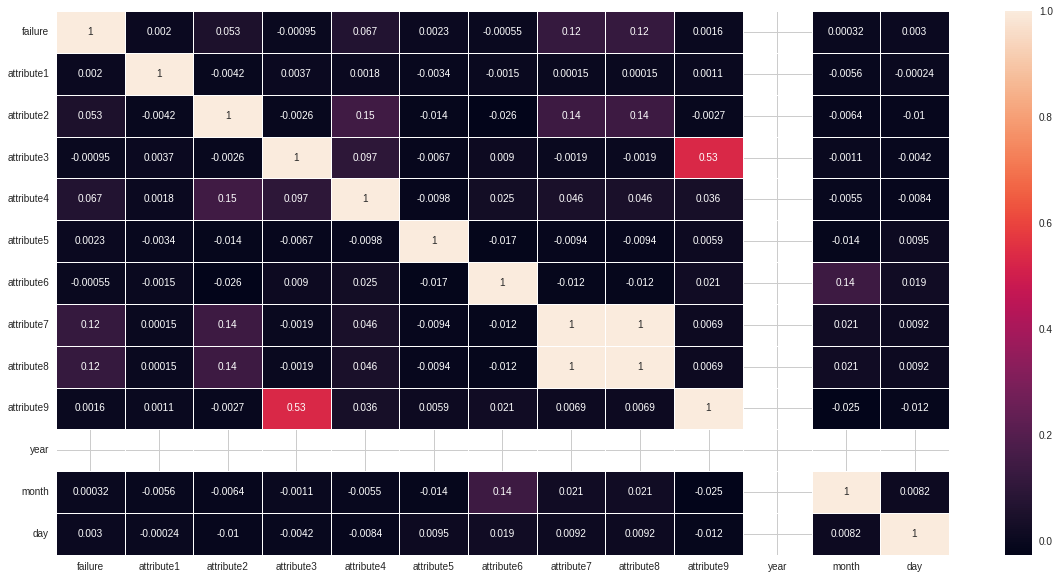

In [138]:
##HeatMap ine bakıyoruz.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [24]:
#heatmap tablosunda da görüldüğü gibi attribute7,attribute8  ve year birbirinin tekrarı ve sabit bir veri olduğundan 
#çıkartılması faydalı olur.

True    124494
dtype: int64

In [139]:
df.drop(["attribute7","attribute8","year"],axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute9  124494 non-null  int64         
 10  month       124494 non-null  int64         
 11  day         124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [140]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

<Axes: >

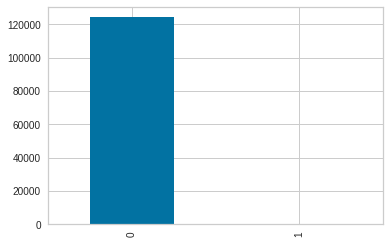

In [141]:

df["failure"].value_counts().plot.bar()

<Axes: xlabel='failure', ylabel='month'>

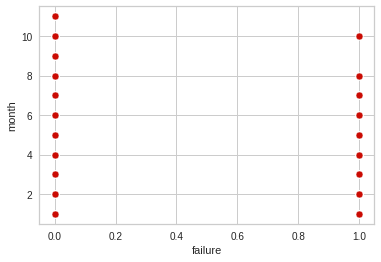

In [142]:
##Aylara göre Fiyat Dağılımını Görmüş olıuuorz.
sns.scatterplot(x='failure',y='month',data=df,color='r')

In [41]:
#for i in df.select_dtypes(include=np.number):
#    sns.boxplot(df[i])
#    plt.show()

In [143]:
## Date ALanını dönüştürüğümüz ve Tek Yıla ait veri olduğundan silinebilir.
del df["date"]

In [144]:
df=pd.get_dummies(df,drop_first=True)

In [145]:
x,y=df.drop("failure",axis=1),df["failure"]

In [37]:

x.shape,y.shape

((124494, 1176), (124494,))

In [43]:
#pip install imblearn.under_sampling

In [44]:
#pip install --upgrade scikit-learn

In [146]:
def fnc_classification_all_model(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [50]:
#Precision-Recall Tradeoff
##Failure Data Farkları çok olduğundan imblearn kütüphanesi kullanıldı. 
#F1 skoru, sınıflandırıcınız için hassasiyet ve geri çağırma arasında bir denge sağlar. 
#Hassasiyetiniz düşükse, F1 düşüktür ve geri çağırma yine düşükse, F1 puanınız düşük çıkmıştır..

In [147]:
##Classic Model Function ımızdan tüm Classificatin Tanımlı Modellerimizi çağırıyoruz.
fnc_classification_all_model(x,y)

,accuracy_score,f1_score,recall_score,precision_score
GaussianNB,0.990939,0.020833,0.081081,0.011952
BernoulliNB,0.889249,0.014298,0.675676,0.007225
RandomForestClassifier,0.842148,0.009675,0.648649,0.004874
GradientBoostingClassifier,0.836236,0.008944,0.621622,0.004505
XGBClassifier,0.799833,0.008593,0.729730,0.004322
DecisionTreeClassifier,0.799640,0.007323,0.621622,0.003683
SVC,0.645868,0.002895,0.432432,0.001452
KNeighborsClassifier,0.490265,0.002264,0.486486,0.001135
LogisticRegression,0.001189,0.002375,1.000000,0.001189


In [ ]:
## Derin Öğrenme ile de bakıyor olacağız.

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)

FailRUS=RandomUnderSampler(random_state=42)
x_FailRUS,y_FailRUS=FailRUS.fit_resample(x_train,y_train)

In [150]:
model=Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu')) 
model.add(Dense(1,activation='sigmoid'))

In [151]:
##epochs 30-40-50 olarak deniyoruz. ideal Epoch 40 olduğunu Öğrendik.
##Classification olduğu için binary_crossentropy kullanıyoruz
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history = model.fit(x_FailRUS,y_FailRUS, batch_size=128, epochs=40, verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
2/2 [==============================] - 4s 2s/step - loss: 1348823.0000 - accuracy: 0.5000 - val_loss: 1773442.8750 - val_accuracy: 0.0012
Epoch 2/40
2/2 [==============================] - 1s 651ms/step - loss: 879052.8750 - accuracy: 0.5000 - val_loss: 1209432.6250 - val_accuracy: 0.0012
Epoch 3/40
2/2 [==============================] - 1s 490ms/step - loss: 600103.6250 - accuracy: 0.5000 - val_loss: 657057.8125 - val_accuracy: 0.0012
Epoch 4/40
2/2 [==============================] - 1s 665ms/step - loss: 323891.3125 - accuracy: 0.5000 - val_loss: 417025.9375 - val_accuracy: 0.0012
Epoch 5/40
2/2 [==============================] - 0s 429ms/step - loss: 210935.7812 - accuracy: 0.5000 - val_loss: 459171.3750 - val_accuracy: 0.0012
Epoch 6/40
2/2 [==============================] - 1s 653ms/step - loss: 232181.3906 - accuracy: 0.5000 - val_loss: 477693.2812 - val_accuracy: 0.0012
Epoch 7/40
2/2 [==============================] - 1s 653ms/step - loss: 240625.5625 - accuracy: 0.50

In [152]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

973/973 [==============================] - 1s 1ms/step - loss: 7.5811 - accuracy: 0.9942
Accuracy: 99.42


In [153]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


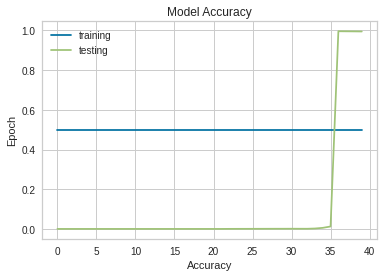

In [154]:
## Model Accuracy  
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

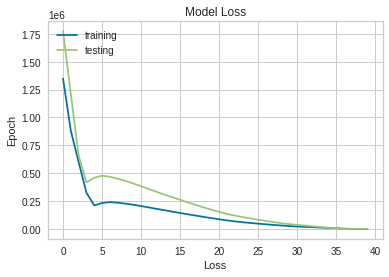

In [155]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show

In [65]:
#yCaret Classification Tahminleme Yapalım

In [2]:
#pip install pycaret

In [3]:
from pycaret.classification import*

In [6]:
df_new=pd.read_csv('failure_new.csv')

In [7]:
exp_name=setup(df_new,target='failure')

,Description,Value
0,Session id,5814
1,Target,failure
2,Target type,Binary
3,Original data shape,"(124494, 1178)"
4,Transformed data shape,"(124494, 1178)"
5,Transformed train set shape,"(87145, 1178)"
6,Transformed test set shape,"(37349, 1178)"
7,Numeric features,1177
8,Preprocess,True
9,Imputation type,simple


In [8]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9992,0.4979,0.0000,0.0000,0.0000,0.0000,0.0000,38.8840
svm,SVM - Linear Kernel,0.9992,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.2800
ridge,Ridge Classifier,0.9992,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.8990
dummy,Dummy Classifier,0.9992,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.4510
lr,Logistic Regression,0.9991,0.4681,0.0000,0.0000,0.0000,-0.0000,-0.0000,9.3060
rf,Random Forest Classifier,0.9991,0.6871,0.0000,0.0000,0.0000,-0.0000,-0.0000,11.5420
xgboost,Extreme Gradient Boosting,0.9991,0.8621,0.0000,0.0000,0.0000,-0.0000,-0.0001,116.7180
ada,Ada Boost Classifier,0.9990,0.8571,0.0268,0.1000,0.0422,0.0420,0.0515,18.7450
qda,Quadratic Discriminant Analysis,0.9988,0.4998,0.0000,0.0000,0.0000,-0.0003,-0.0004,17.6450
gbc,Gradient Boosting Classifier,0.9988,0.8315,0.0000,0.0000,0.0000,-0.0004,-0.0005,30.5020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]